In [6]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, make_scorer
from sklearn.model_selection import GridSearchCV


In [7]:
#get the data sets
X_train = pd.read_csv('../data/train_df.csv')
X_test = pd.read_csv('../data/test_df.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

X_without_clusters_train  = X_train.drop(columns=[x for x in X_train.columns if 'cluster_by_hierarcal_5' in x] + [x for x in X_train.columns if 'kmeans_wlang_elbow' in x]+ [x for x in X_train.columns if 'kmeans_wolang_elbow_' in x])
X_without_clusters_test = X_test.drop(columns=[x for x in X_test.columns if 'cluster_by_hierarcal_5' in x] + [x for x in X_test.columns if 'kmeans_wlang_elbow' in x]+ [x for x in X_test.columns if 'kmeans_wolang_elbow_' in x])


In [8]:
scorer = make_scorer(average_precision_score, needs_proba=True)

# Define the model
model = XGBClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [ 0.03, 0.05, 0.1,],
    'colsample_bytree': [0.9, 0.95, 1.0],
    'n_estimators': [100, 200, 300],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorer, verbose=5)
grid_search_without_clusters = GridSearchCV(model, param_grid, cv=5, scoring=scorer, verbose=5)


/Users/danny/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [9]:
grid_search.fit(X_train, y_train)
grid_search_without_clusters.fit(X_without_clusters_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.03, max_depth=3, n_estimators=100;, score=0.955 total time=   0.7s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.03, max_depth=3, n_estimators=100;, score=0.966 total time=   1.0s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.03, max_depth=3, n_estimators=100;, score=0.977 total time=   0.9s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.03, max_depth=3, n_estimators=100;, score=0.962 total time=   0.9s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.03, max_depth=3, n_estimators=100;, score=0.958 total time=   0.7s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.03, max_depth=3, n_estimators=200;, score=0.965 total time=   1.4s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.03, max_depth=3, n_estimators=200;, score=0.970 total time=   1.6s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.03, max_depth=3, n_estimators=200;, score=0.982 total time=  

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

print("Best parameters:", grid_search_without_clusters.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_without_clusters.best_score_))

Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}
Best cross-validation score: 0.97
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}
Best cross-validation score: 0.97


In [ ]:
best_model = grid_search.best_estimator_
best_model_without_clusters = grid_search_without_clusters.best_estimator_


NameError: name 'grid_search' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict test data
y_pred = best_model.predict(X_test)
y_pred_without_clusters = best_model_without_clusters.predict(X_without_clusters_test)
# Evaluate the model
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

# Print the results
print(f"with clusters")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

report = classification_report(y_test, y_pred_without_clusters, output_dict=True)
accuracy = report['accuracy']
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

# Print the results
print(f"with clusters")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

NameError: name 'best_model' is not defined

In [ ]:
y_pred_prob = best_model.predict_proba(X_test)
y_pred_prob_without_clusters = best_model_without_clusters.predict_proba(X_without_clusters_test)

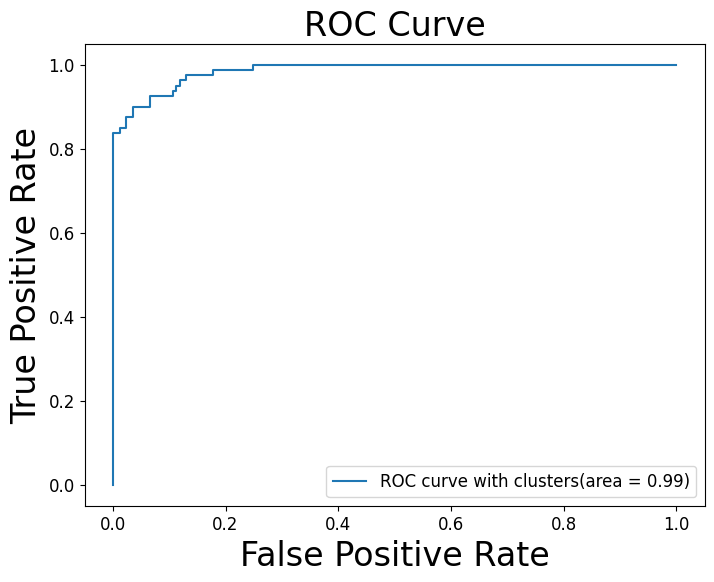

In [ ]:


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve with clusters(area = {roc_auc_score(y_test, y_pred_prob[:, 1]):.2f})')
plt.xlabel('False Positive Rate', fontsize=24)
plt.ylabel('True Positive Rate', fontsize=24)
plt.title('ROC Curve', fontsize=24)
plt.legend(loc='best')
plt.show()

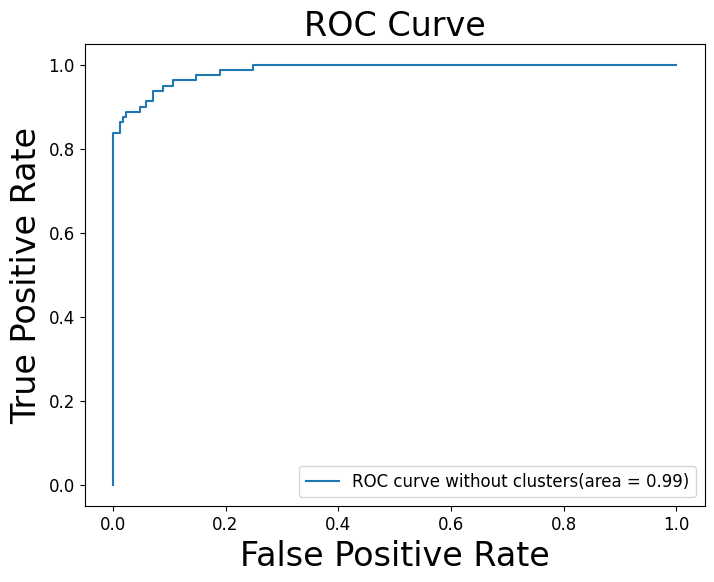

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_without_clusters[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve without clusters(area = {roc_auc_score(y_test, y_pred_prob[:, 1]):.2f})')
plt.xlabel('False Positive Rate', fontsize=24)
plt.ylabel('True Positive Rate', fontsize=24)
plt.title('ROC Curve', fontsize=24)
plt.legend(loc='best')
plt.show()

In [ ]:
import shap

model = shap.TreeExplainer(best_model)
shap_values = model.shap_values(X_test)

# Set global text properties
plt.rcParams['font.size'] = 14  # sets the global font size
plt.rcParams['axes.labelsize'] = 14  # sets the font size for labels on x and y axes
plt.rcParams['xtick.labelsize'] = 12  # sets the font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # sets the font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 12  # sets the font size for legends

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Show plot
plt.show()

/Users/danny/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'best_model' is not defined

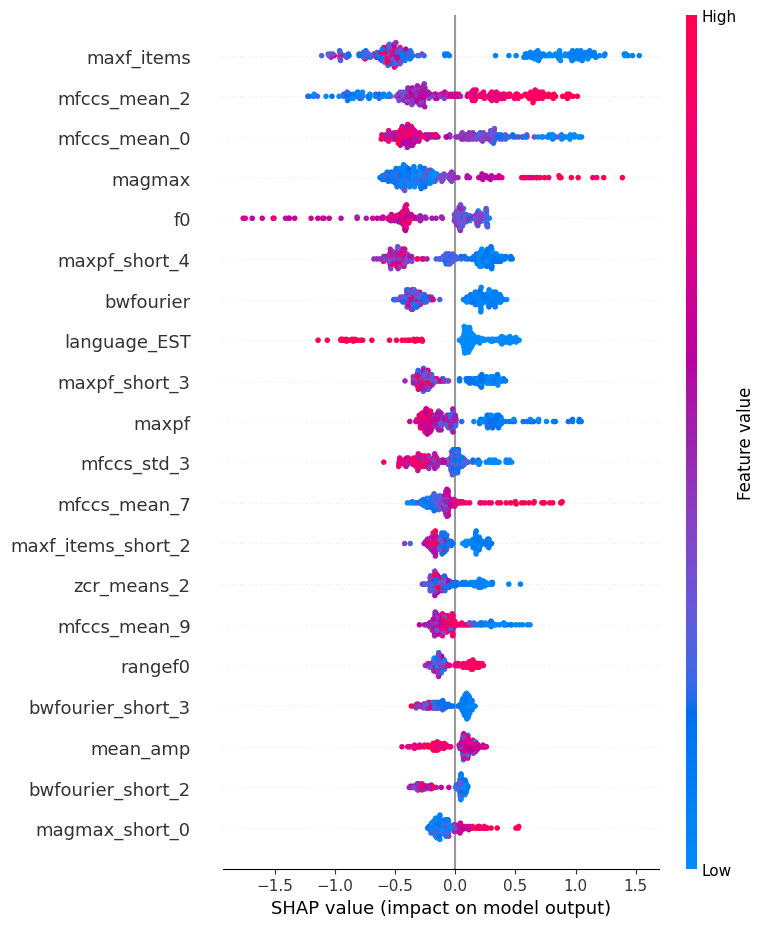

In [ ]:

model_without_clusters = shap.TreeExplainer(best_model_without_clusters)
shap_values_without_clusters = model_without_clusters.shap_values(X_without_clusters_test)

# Set global text properties
plt.rcParams['font.size'] = 14  # sets the global font size
plt.rcParams['axes.labelsize'] = 14  # sets the font size for labels on x and y axes
plt.rcParams['xtick.labelsize'] = 12  # sets the font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # sets the font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 12  # sets the font size for legends

# Generate SHAP summary plot
shap.summary_plot(shap_values_without_clusters, X_without_clusters_test)

# Show plot
plt.show()

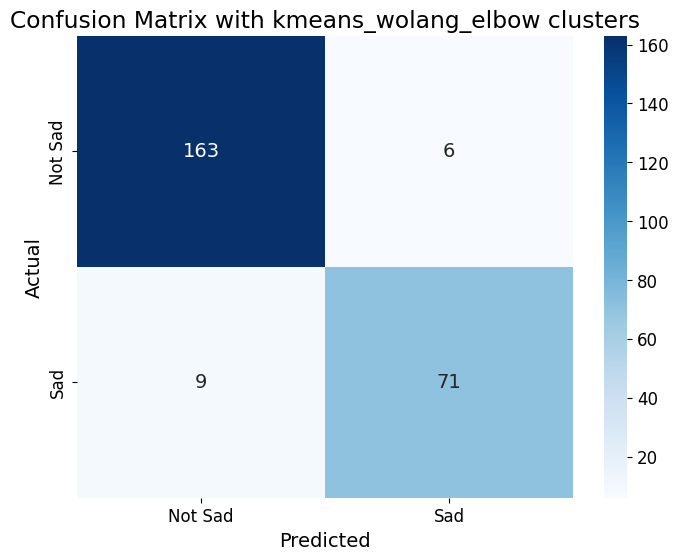

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sad', 'Sad'], yticklabels=['Not Sad', 'Sad'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix with kmeans_wolang_elbow clusters')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred_without_clusters)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sad', 'Sad'], yticklabels=['Not Sad', 'Sad'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix without clusters')
plt.show()

NameError: name 'y_test' is not defined